# Image transformation

### Affine transformation:

* Resize
* Rotate
* Translation


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def image_show(window_name,image):
    cv2.imshow(window_name,image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def image_show_multiple(window_name,image):
    for i,item in enumerate(window_name):
        cv2.imshow(window_name[i],image[i])
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def image_plot_multiple(title,image):
    L=len(title)
    ncols=min(L,3)
    nrows=int(np.ceil(L/ncols))
    plt.subplots(nrows,ncols,figsize=(5*ncols,nrows*5))
    for i,item in enumerate(title):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB))
        plt.title(title[i])

## Resize or Rescale Image

### cv2.resize is used where different type of interpolation are used for upsampling or downsampling an image

In [7]:
image_path=os.path.join('images','Dreaming_about_a_horse.jpg')
image=cv2.imread(image_path)
resized_image=cv2.resize(image,None,fx=0.5,fy=0.5)
print('Original Image size: ', image.shape)
print('Resized Image size: ', resized_image.shape)
image_show_multiple(['Original','Resized'],[image, resized_image])

Original Image size:  (450, 600, 3)
Resized Image size:  (225, 300, 3)


![title](output/resize1.png)

In [8]:
resized_image=cv2.resize(image,None,fx=1.2,fy=1.2,interpolation=cv2.INTER_LANCZOS4)
print('Original Image size: ', image.shape)
print('Resized Image size: ', resized_image.shape)
image_show_multiple(['Original','Resized'],[image, resized_image])

Original Image size:  (450, 600, 3)
Resized Image size:  (540, 720, 3)


![title](output/resize2.png)

In [9]:
resized_image=cv2.resize(image,(400,500),interpolation=cv2.INTER_CUBIC)
print('Original Image size: ', image.shape)
print('Resized Image size: ', resized_image.shape)
image_show_multiple(['Original','Resized'],[image, resized_image])

Original Image size:  (450, 600, 3)
Resized Image size:  (500, 400, 3)


![title](output/resize3.png)

## Rotate an image

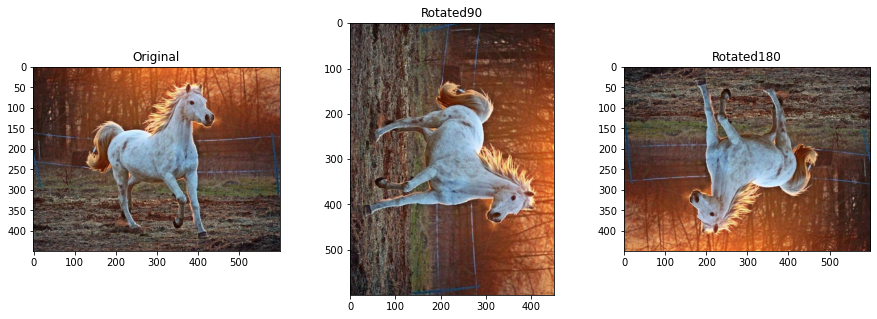

In [10]:
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) 
rotated_image_180 = cv2.rotate(image, cv2.ROTATE_180) 
image_plot_multiple(['Original','Rotated90','Rotated180'],[image, rotated_image, rotated_image_180])

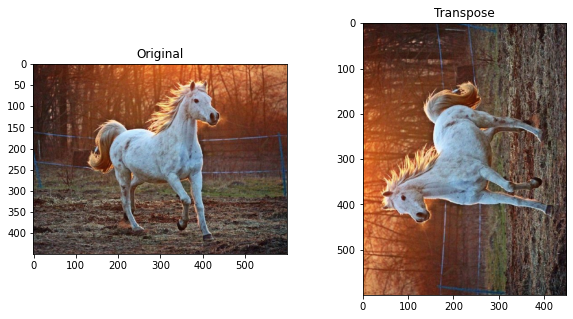

In [11]:
transposed_image=cv2.transpose(image)
image_plot_multiple(['Original','Transpose'],[image, transposed_image])

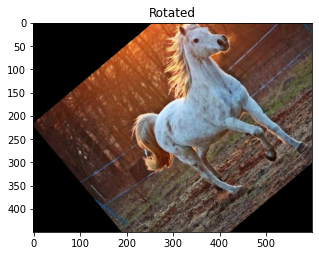

In [12]:
#using cv2.getRotationMatrix2D
rows,cols = image.shape[0:2]
mat = cv2.getRotationMatrix2D((cols/2,rows/4),40,1)
rotImage = cv2.warpAffine(image,mat,(cols,rows))
image_plot_multiple(['Rotated'],[rotImage])

# Translation

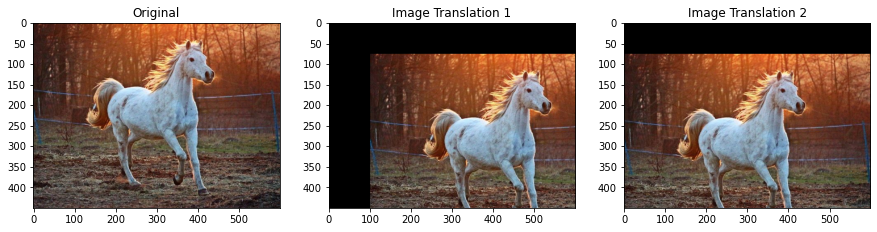

In [13]:
height=image.shape[0]
width=image.shape[1]
shift_height, shift_width = height/6, width/6
  
T1 = np.float32([[1, 0, shift_width], [0, 1, shift_height]]) 
img_translation1 = cv2.warpAffine(image, T1, (width, height)) 

T2 = np.float32([[1, 0, 0], [0, 1, shift_height]]) 
img_translation2 = cv2.warpAffine(image, T2, (width, height)) 
image_plot_multiple(['Original','Image Translation 1', 'Image Translation 2'],[image, img_translation1,img_translation2])

## Affine Transform using cv2.getAffineTransform
* In Affine transformation, all parallel lines in the original image remains parallel in the output image. cv2.getAffineTRansform finds the transformation matrix using three points from input image and their corresponding locations in the output image. 

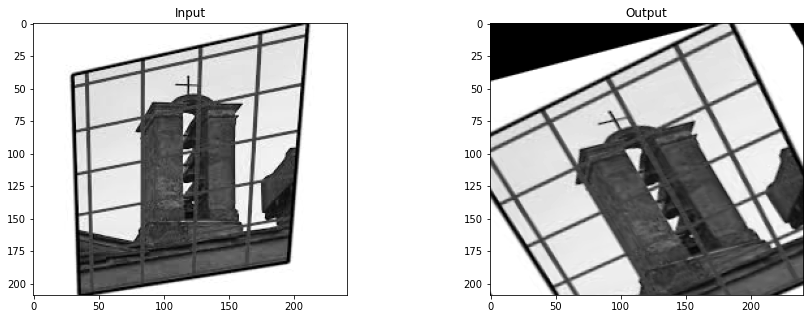

In [14]:
img = cv2.imread(os.path.join('images','perspective.jpeg'),0)
rows,cols= img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(img,'gray'),plt.title('Input')
plt.subplot(122),plt.imshow(dst,'gray'),plt.title('Output')
plt.show()